# Exploratory Data Analysis

## Objective

Look at the different data points within the data, and try to best understand the data at a high level, as well as any interactions or transformations that may need to occur

In [6]:
# Load in the needed Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Section for Useful Functions

In [7]:
def mean_normalization(df_column):
    nrml_data = (df_column-df_column.mean())/df_column.std()
    return nrml_data

In [8]:
def min_max_normalization(df_column):
    mm_data = (df_column-df_column.min())/(df_column.max() - df_column.min())
    return mm_data

## Read in the Data

In [9]:
train_data = pd.read_csv(r"train.csv")

In [10]:
train_data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

## Exploratory Data Analysis

### Disbursed Amount

Not sure what will be the best normalization method here. Look at non-regularized data, mean normalized, min-max normalized, as well as a log transformation. The log transformation causes the data to follow a much more normal distribution, but that is not necessarily required.

In [12]:
# Get aggregate summary statistics to get an understanding of the spread of the data
train_data.disbursed_amount.describe()

count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: disbursed_amount, dtype: float64

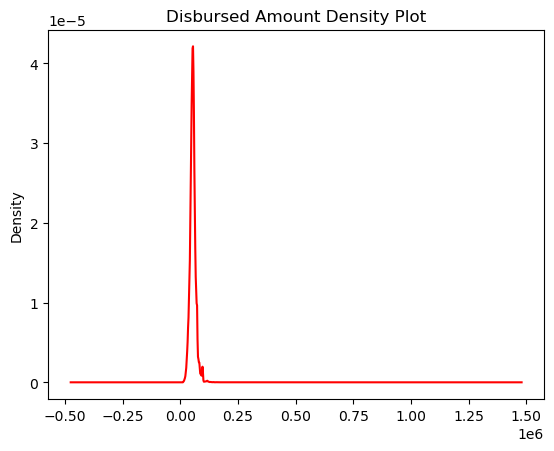

In [13]:
train_data.disbursed_amount.plot.density(color = 'red')
plt.title('Disbursed Amount Density Plot')
plt.show()

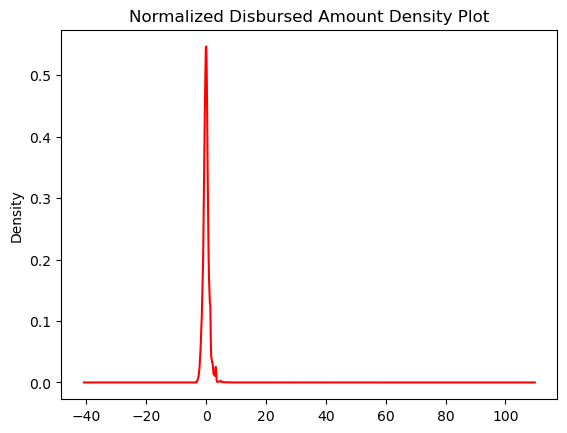

In [14]:
# Using Mean Normalization
nrml_da = mean_normalization(train_data.disbursed_amount)
nrml_da.plot.density(color = 'red')
plt.title('Normalized Disbursed Amount Density Plot')
plt.show()

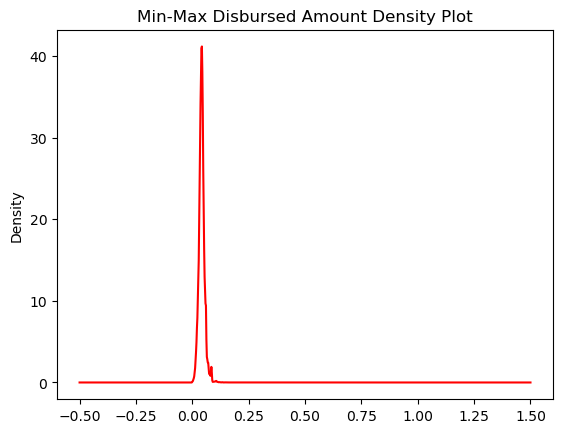

In [15]:
# Using Min-Max Normailzation
mm_da = min_max_normalization(train_data.disbursed_amount)
mm_da.plot.density(color = 'red')
plt.title('Min-Max Disbursed Amount Density Plot')
plt.show()

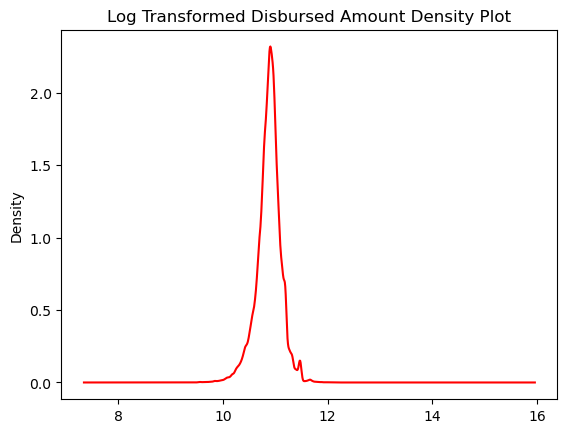

In [16]:
# Using Log Transformation
disbursed_amount = train_data.disbursed_amount
log_da = np.log(disbursed_amount)
log_da.plot.density(color = 'red')
plt.title('Log Transformed Disbursed Amount Density Plot')
plt.show()

### Asset Cost

Also not sure here what will be the best method of regularization. But the numbers are similar to that of the distributed amount.

In [17]:
train_data.asset_cost.describe()

count    2.331540e+05
mean     7.586507e+04
std      1.894478e+04
min      3.700000e+04
25%      6.571700e+04
50%      7.094600e+04
75%      7.920175e+04
max      1.628992e+06
Name: asset_cost, dtype: float64

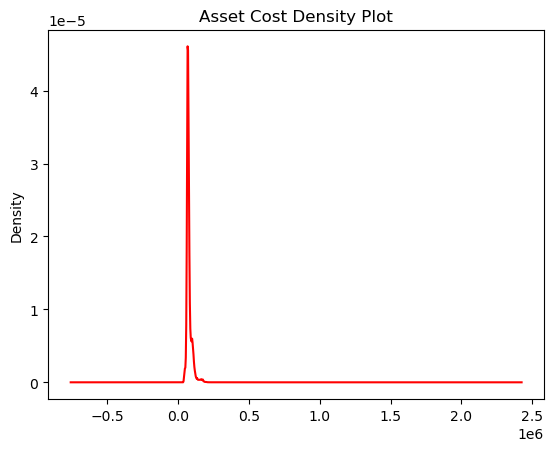

In [18]:
train_data.asset_cost.plot.density(color = 'red')
plt.title('Asset Cost Density Plot')
plt.show()

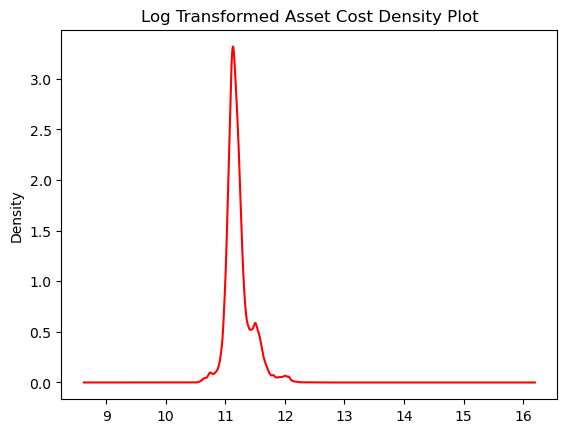

In [19]:
# Using Log Transform
nrml_data = np.log(train_data.asset_cost)
nrml_data.plot.density(color = 'red')
plt.title('Log Transformed Asset Cost Density Plot')
plt.show()

### LTV (Loan to Value of the Asset)

This is definately left skewed. A log transform most likely wouldnt be usable here due to the lower value numbers, so excluded for the time being.

In [20]:
train_data.ltv.describe()

count    233154.000000
mean         74.746530
std          11.456636
min          10.030000
25%          68.880000
50%          76.800000
75%          83.670000
max          95.000000
Name: ltv, dtype: float64

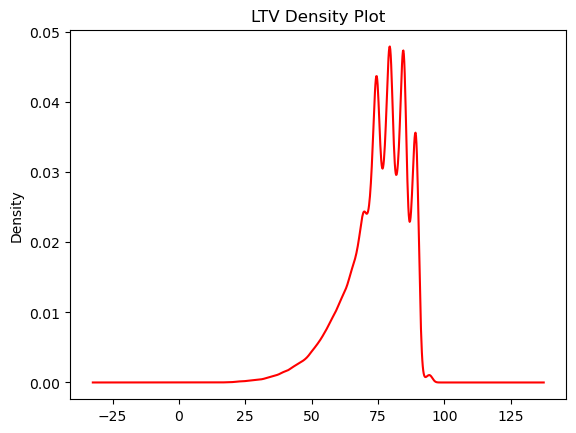

In [21]:
train_data.ltv.plot.density(color = 'red')
plt.title('LTV Density Plot')
plt.show()

### Branch ID

Want to understand the distribution, and the number of branch IDs within the dataset. There are 82 unique branch ids, and the spread is not equal across all branches.

In [22]:
train_data.branch_id = train_data.branch_id.astype('category')
train_data.branch_id.describe()

count     233154
unique        82
top            2
freq       13138
Name: branch_id, dtype: int64

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


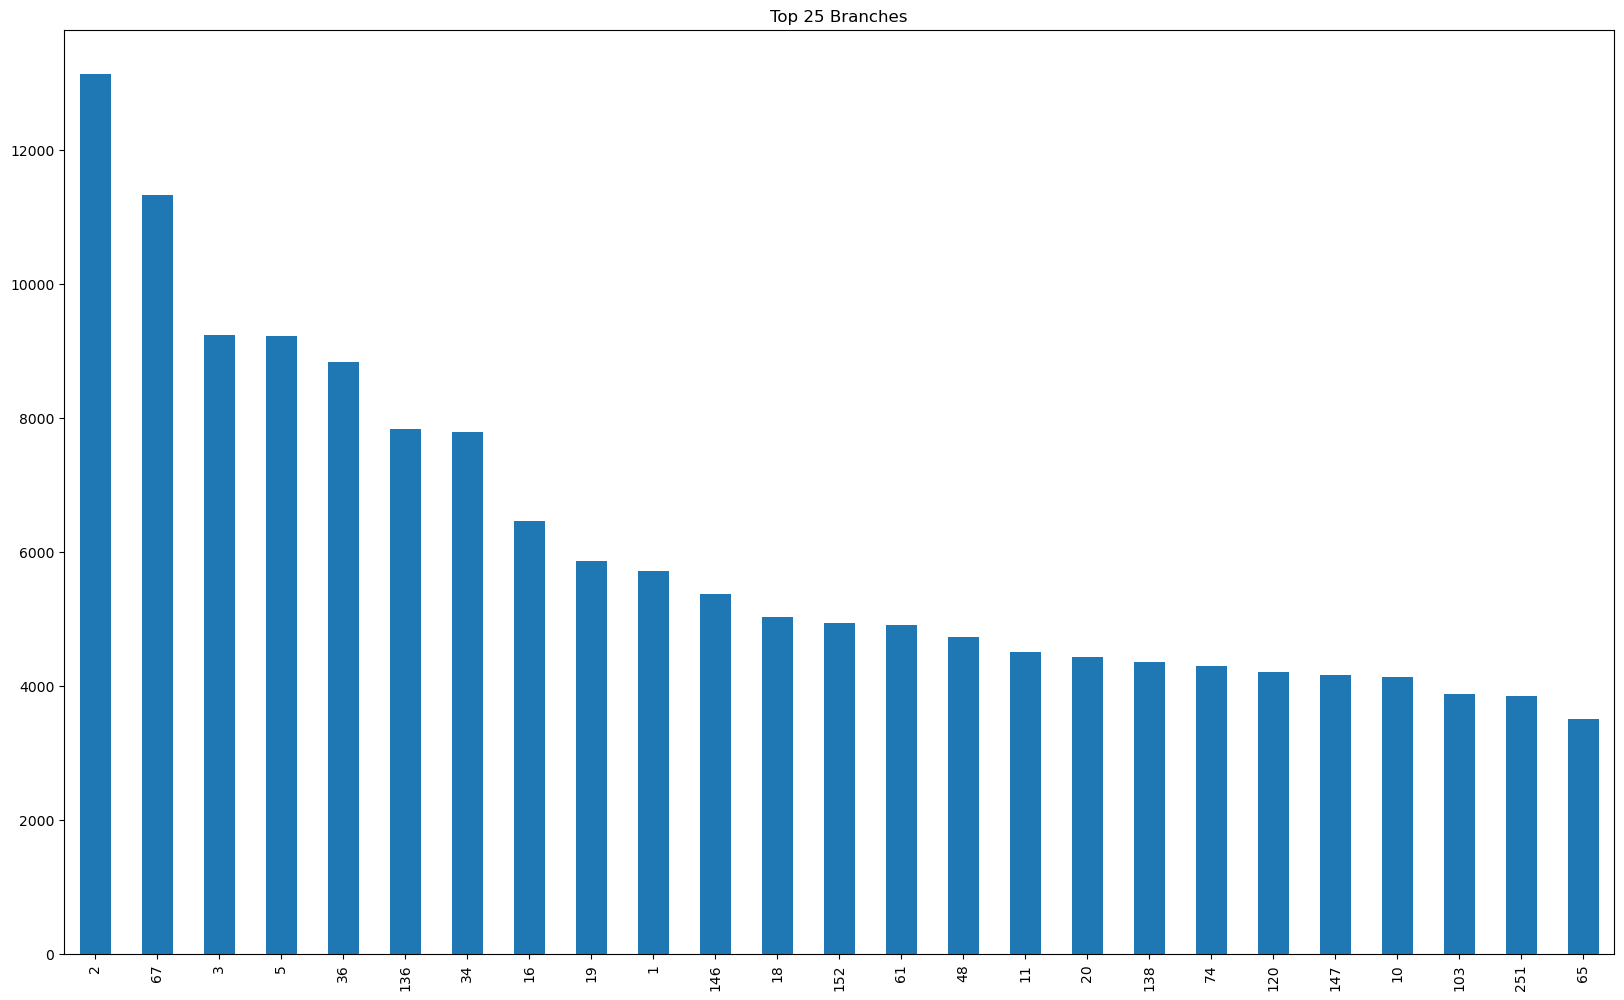

In [23]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 12)

train_data.branch_id.value_counts()[:25].plot(kind = 'bar')
plt.title('Top 25 Branches')
plt.show()

pylab.rcParams['figure.figsize'] = (10, 6)

count    82.000000
mean      0.012195
std       0.011528
min       0.000296
25%       0.003670
50%       0.008213
75%       0.017805
max       0.056349
Name: branch_id, dtype: float64


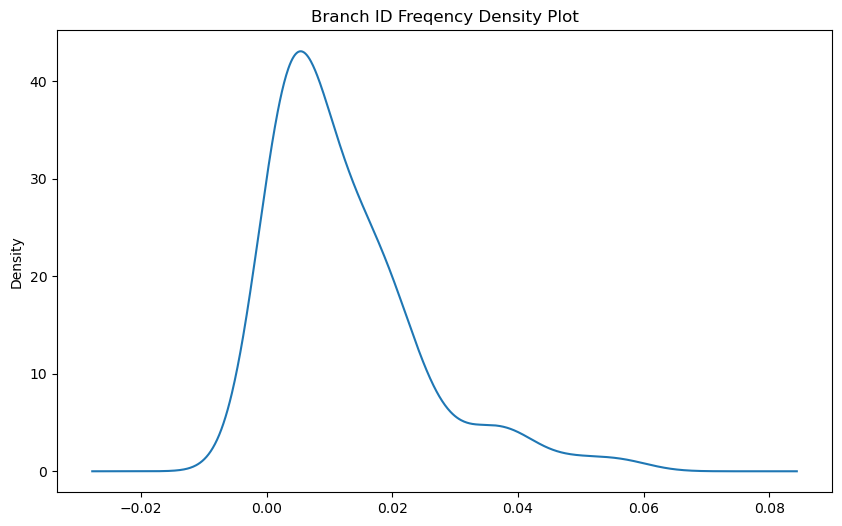

In [24]:
freq_data = train_data.branch_id.value_counts()/train_data.branch_id.count()
print(freq_data.describe())

freq_data.plot.density()
plt.title('Branch ID Freqency Density Plot')
plt.show()

### Supplier ID

There are 2953 unique supplier IDs. Which is a TON. Might be hard to use this depending on which method we decide to go with. Not super equally split amount Supplier IDs, but they are more evenly split than Branches.

In [25]:
train_data.supplier_id = train_data.supplier_id.astype('category')
train_data.supplier_id.describe()

count     233154
unique      2953
top        18317
freq        1432
Name: supplier_id, dtype: int64

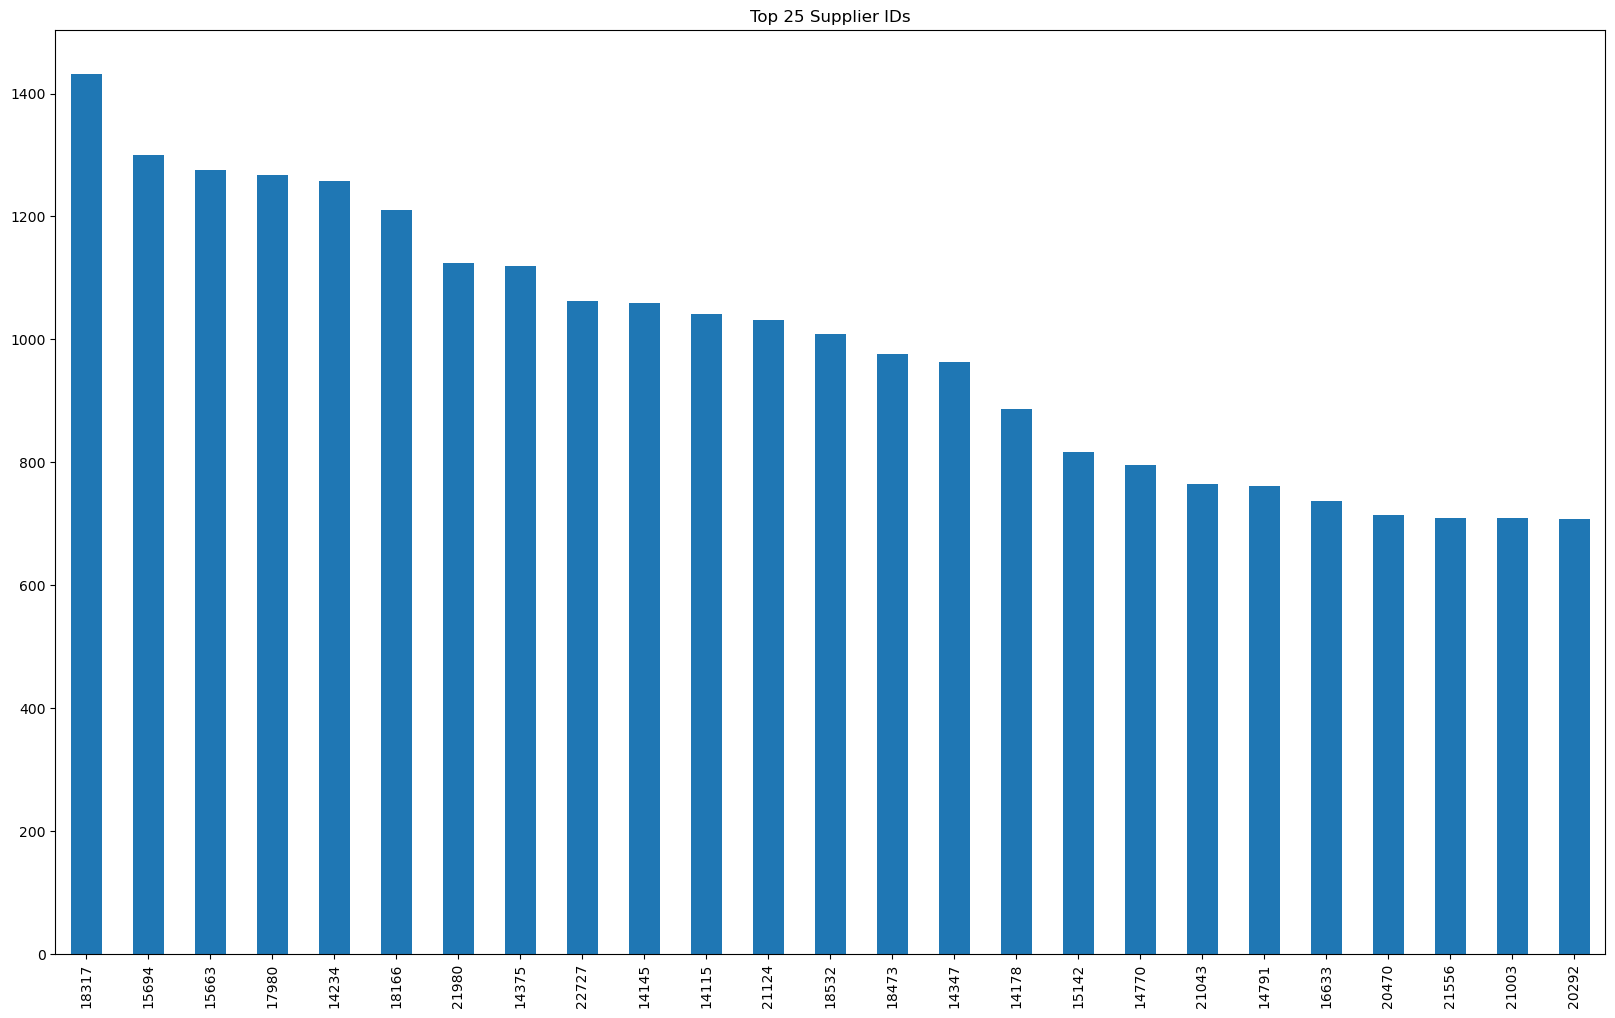

In [26]:
pylab.rcParams['figure.figsize'] = (20, 12)
train_data.supplier_id.value_counts()[:25].plot(kind = 'bar')
plt.title('Top 25 Supplier IDs')
plt.show()
pylab.rcParams['figure.figsize'] = (10, 6)

count    2953.000000
mean        0.000339
std         0.000567
min         0.000004
25%         0.000047
50%         0.000154
75%         0.000369
max         0.006142
Name: supplier_id, dtype: float64


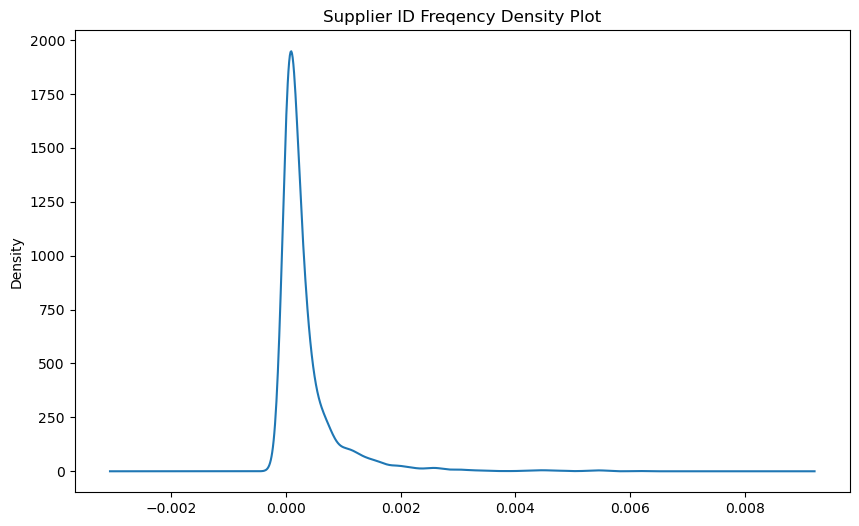

In [27]:
freq_data = train_data.supplier_id.value_counts()/train_data.supplier_id.count()
print(freq_data.describe())

freq_data.plot.density()
plt.title('Supplier ID Freqency Density Plot')
plt.show()